# Final Project


# I. Perkenalan

- Nama  : Ida Ayu Gede Ima Dewi Pertami
- Batch : HCK-004

Problems Statement:
- Perusahaan ini bergerak di bidang retail dan memiliki banyak cabang yang tersebar di beberapa area. Saat ini, perusahaan mengalami masalah dalam mengelola persediaan produk karena mereka kesulitan untuk memperkirakan jumlah produk yang dibutuhkan di setiap cabang pada periode waktu tertentu. Hal ini menyebabkan beberapa cabang mengalami kekurangan produk atau bahkan kelebihan persediaan produk yang tidak terjual. Oleh karena itu, perusahaan membutuhkan sebuah solusi untuk memperkirakan jumlah produk yang dibutuhkan di setiap cabang pada periode waktu tertentu.

Objective:
- untuk membantu perusahaan dalam mengelola persediaan produk mereka dengan membangun model time series yang dapat memprediksi jumlah produk yang dibutuhkan di setiap cabang pada periode waktu tertentu. Model ini diharapkan dapat membantu perusahaan dalam membuat keputusan yang lebih tepat terkait jumlah produk yang harus diproduksi dan didistribusikan ke setiap cabang.

Latar Belakang:
- Mengelola persediaan produk adalah salah satu hal yang penting dalam bisnis retail. Jika persediaan produk tidak terkelola dengan baik, maka akan berdampak pada ketersediaan produk di setiap cabang. Ketersediaan produk yang buruk akan membuat pelanggan kecewa dan memilih untuk berbelanja di tempat lain. Oleh karena itu, Perusahaan perlu memperkirakan jumlah produk yang dibutuhkan di setiap cabang pada periode waktu tertentu dengan akurat untuk menghindari kelebihan atau kekurangan persediaan produk. Model time series dapat membantu perusahaan dalam memperkirakan jumlah produk yang dibutuhkan di setiap cabang pada periode waktu tertentu dengan lebih akurat dan efisien.
    


# II. Import Libraries

In [1]:
# using for dataset
import numpy as np
import pandas as pd

# using for visualization
import matplotlib.pylab as plt
import seaborn as sns

# using for model evaluation 
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# using for visualization foreacsting
from statsmodels.tsa.seasonal import seasonal_decompose

# using for modeling
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import ExponentialSmoothing


import warnings
warnings.filterwarnings(action='ignore')

# III. Data Loading

In [2]:
# load dataset dan cek missing value non standard
missing_values = ["n/a", "na", "--", "none", "?", "-",' ?', 'NaN', ' nan']
df = pd.read_csv('../FP/sample_dataset_timeseries_noarea.csv', na_values = missing_values)

# menampilkan semua kolom pada 5 baris dataset teratas
df.head(5)

,week_number,week_start_date,week_end_date,product_item,quantity
0,2021-52,2021-12-27,2022-01-02,0073377087c7ddace313ff829cd7b0b3,41
1,2021-52,2021-12-27,2022-01-02,012d2bb142b2d5e57330acbfd8e9ac52,430
2,2021-52,2021-12-27,2022-01-02,0192926e33d1153b63511a5b83eca843,4
3,2021-52,2021-12-27,2022-01-02,019502f6d13e383caa9b9673bf1302f8,148
4,2021-52,2021-12-27,2022-01-02,01e7ca6d4e21badc1d4225b6b2c7bd9e,119


-  Missing value pada dataset diganti menjadi nan value

In [3]:
# menampilkan 5 baris dataset terakhir
df.tail(5)

,week_number,week_start_date,week_end_date,product_item,quantity
102728,2023-14,2023-04-03,2023-04-09,ff3890faa80ff425ae906e27bbc50bc6,907
102729,2023-14,2023-04-03,2023-04-09,ff4b0f3b9c78c91510a4e3920fbc5090,81
102730,2023-14,2023-04-03,2023-04-09,ff9d05a4d6f922b3ab1653f58165b8ce,16
102731,2023-14,2023-04-03,2023-04-09,ffbd6f1d884056a4f622d54ae79e5a14,42920
102732,2023-14,2023-04-03,2023-04-09,fff18f7c705e729746515e2053dee64b,53


In [4]:
# melihat jumlah baris dan kolom pada dataset
df.shape

(102733, 5)

- Dataset ini terdiri dari 102.733 baris dan 5 kolom.

In [5]:
# memeriksa informasi dasar dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102733 entries, 0 to 102732
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   week_number      102733 non-null  object
 1   week_start_date  102733 non-null  object
 2   week_end_date    102733 non-null  object
 3   product_item     102731 non-null  object
 4   quantity         102733 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 3.9+ MB


Berikut ini adalah penjelasan dari masing-masing kolom pada dataset :
- week_number: Nomor urut minggu dalam setahun pada rentang 1-52
- week_start_date: Tanggal awal dari minggu tersebut
- week_end_date: Tanggal akhir dari minggu tersebut
- product_item: Nama atau kode produk yang terjual
- quantity: Jumlah produk yang terjual pada minggu tersebut

In [6]:
# mengubah tipe data kolom week_start_date dan week_end_date ke datetime
df['week_start_date'] = pd.to_datetime(df['week_start_date'])
df['week_end_date'] = pd.to_datetime(df['week_end_date'])

In [7]:
# memeriksa informasi dasar dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102733 entries, 0 to 102732
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   week_number      102733 non-null  object        
 1   week_start_date  102733 non-null  datetime64[ns]
 2   week_end_date    102733 non-null  datetime64[ns]
 3   product_item     102731 non-null  object        
 4   quantity         102733 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.9+ MB


- Dtype pada week_start_date dan week_end_date sudah diubah menjadi datetime64 

In [8]:
# mencari dataset yang duplikasi
df[df.duplicated()].shape

(0, 5)

- Tidak terdapat data duplikasi pada dataset

In [9]:
# mencari missing value
df.isnull().sum()

week_number        0
week_start_date    0
week_end_date      0
product_item       2
quantity           0
dtype: int64

- Missing values terdapat pada kolom product_item dengan total 2 missing values

In [10]:
# mencari letak missing value pada price
df.loc[df['product_item'].isnull()]

,week_number,week_start_date,week_end_date,product_item,quantity
18048,2022-12,2022-03-21,2022-03-27,NaN,119
19536,2022-13,2022-03-28,2022-04-03,NaN,147


In [11]:
# melihat persentase missing value pada masing-masing kolom dan menghitung total persentase missing values pada dataset
missing_percentage = (df.isna().sum() / len(df)) * 100
print(missing_percentage)

total_missing = df.isna().sum().sum()
percentage_missing = (total_missing / (df.shape[0] * df.shape[1])) * 100
print(f"Persentase keseluruhan missing values di DataFrame adalah: {percentage_missing:.2f}%")

week_number        0.000000
week_start_date    0.000000
week_end_date      0.000000
product_item       0.001947
quantity           0.000000
dtype: float64
Persentase keseluruhan missing values di DataFrame adalah: 0.00%


- Terlihat bahwa pesentase missing values tidak mencapai 5 % baik dilihat secara keseluruhan atau berdasarkan masing-masing kolom, maka missing values dihandling dengan cara di trimming
- Trimming yaitu menghapus baris atau kolom yang mengandung nilai yang hilang. Skema ini bisa diterapkan jika jumlah data yang hilang tidak terlalu banyak sehingga tidak berdampak pada kualitas analisis.

In [12]:
# menghapus baris pada product_item yang terdapat missing value
df.dropna(subset=['product_item'], inplace=True)

In [13]:
# mengecek kembali jumlah missing values
(df.isnull().values.sum())

0

- Setelah missing values dihandling dengan cara ditriiming tidak ada lagi missing values pada dataset

# IV. Exploratory Data Analysis (EDA)

In [14]:
# menampilkan statistik deskriptif dari dataset
df.describe()

,quantity
count,102731.000000
mean,3191.621964
std,12074.741009
min,0.000000
25%,75.000000
50%,414.000000
75%,1890.000000
max,774732.000000


- Dari deskripsi tersebut, dapat diketahui bahwa pada kolom "quantity" terdapat 102731 data, dengan rata-rata sebesar 3191.62, dan standar deviasi sebesar 12074.74, yang menunjukkan bahwa terdapat variasi yang besar pada data. Selain itu, nilai minimum adalah 0, sedangkan nilai maksimum adalah 774732. Nilai kuartil pertama, median, dan kuartil ketiga juga memberikan gambaran tentang distribusi data pada kolom tersebut.

In [81]:
# melihat nilai unik yang ada pada kolom week number
df.week_number.unique()

array(['2021-52', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05',
       '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11',
       '2022-12', '2022-13', '2022-14', '2022-15', '2022-16', '2022-17',
       '2022-18', '2022-19', '2022-20', '2022-21', '2022-22', '2022-23',
       '2022-24', '2022-25', '2022-26', '2022-27', '2022-28', '2022-29',
       '2022-30', '2022-31', '2022-32', '2022-33', '2022-34', '2022-35',
       '2022-36', '2022-37', '2022-38', '2022-39', '2022-40', '2022-41',
       '2022-42', '2022-43', '2022-44', '2022-45', '2022-46', '2022-47',
       '2022-48', '2022-49', '2022-50', '2022-51', '2022-52', '2023-01',
       '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07',
       '2023-08', '2023-09', '2023-10', '2023-11', '2023-12', '2023-13',
       '2023-14'], dtype=object)

- Terdapat 67 minggu pada dataset ini

(array([18993., 19052., 19113., 19174., 19236., 19297., 19358., 19417.]),
 [Text(18993.0, 0, '2022-01'),
  Text(19052.0, 0, '2022-03'),
  Text(19113.0, 0, '2022-05'),
  Text(19174.0, 0, '2022-07'),
  Text(19236.0, 0, '2022-09'),
  Text(19297.0, 0, '2022-11'),
  Text(19358.0, 0, '2023-01'),
  Text(19417.0, 0, '2023-03')])

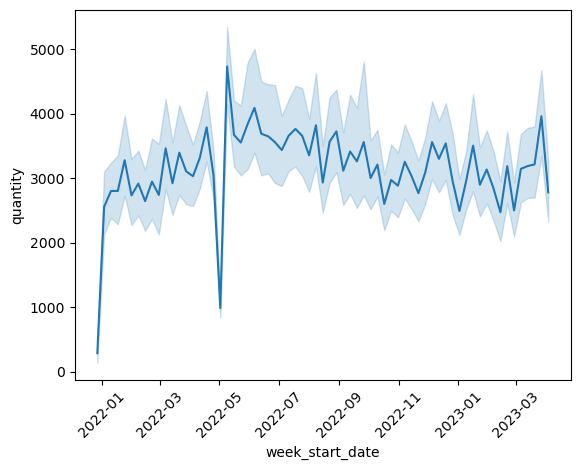

In [15]:
# menampilkan tren data dari kolom quantity menggunakan line plot
sns.lineplot(data=df, x="week_start_date", y="quantity")
plt.xticks(rotation=45)

- Plot di atas merupakan plot garis yang menunjukkan perubahan jumlah kuantitas barang dari waktu ke waktu. Terdapat 8 titik label pada sumbu X yang menunjukkan waktu dari Januari 2022 hingga Maret 2023. Terlihat bahwa jumlah kuantitas barang cenderung stabil pada nilai sekitar 0 hingga 1000 pada awal periode waktu, kemudian mengalami peningkatan secara perlahan pada pertengahan periode waktu, dan akhirnya kembali stabil pada nilai sekitar 0 hingga 1000 pada akhir periode waktu.

In [16]:
# buat kolom baru year
df['year'] = df['week_start_date'].dt.year

In [17]:
# melihat nilai unik pada year
df.year.unique()

array([2021, 2022, 2023])

- Hasil di atas merupakan array yang berisi tahun-tahun yang terdapat dalam dataset. Tahun-tahun tersebut yaitu 2021, 2022, dan 2023.

In [18]:
# buat kolom baru month
df['month'] = df['week_start_date'].dt.month_name()

# filter data hanya untuk tahun 2021
df_2021 = df[df['year'] == 2021]

# hitung jumlah week di tiap bulan di tahun 2021
weeks_by_month = df_2021.groupby('month')['week_start_date'].apply(lambda x: x.dt.date.unique())

# tampilkan hasil
print(weeks_by_month)

month
December    [2021-12-27]
Name: week_start_date, dtype: object


- Pada tahun 2021 hanya terdapat 1 bulan pada dataset yaitu Desember

In [79]:
# filter data hanya untuk tahun 2022
df_2022 = df[df['year'] == 2022]

# hitung jumlah week di tiap bulan di tahun 2022
weeks_by_month = df_2022.groupby('month')['week_start_date'].apply(lambda x: x.dt.date.unique())

# tampilkan hasil
print(weeks_by_month)

month
April         [2022-04-04, 2022-04-11, 2022-04-18, 2022-04-25]
August       [2022-08-01, 2022-08-08, 2022-08-15, 2022-08-2...
December      [2022-12-05, 2022-12-12, 2022-12-19, 2022-12-26]
February      [2022-02-07, 2022-02-14, 2022-02-21, 2022-02-28]
January      [2022-01-03, 2022-01-10, 2022-01-17, 2022-01-2...
July          [2022-07-04, 2022-07-11, 2022-07-18, 2022-07-25]
June          [2022-06-06, 2022-06-13, 2022-06-20, 2022-06-27]
March         [2022-03-07, 2022-03-14, 2022-03-21, 2022-03-28]
May          [2022-05-02, 2022-05-09, 2022-05-16, 2022-05-2...
November      [2022-11-07, 2022-11-14, 2022-11-21, 2022-11-28]
October      [2022-10-03, 2022-10-10, 2022-10-17, 2022-10-2...
September     [2022-09-05, 2022-09-12, 2022-09-19, 2022-09-26]
Name: week_start_date, dtype: object


- Di tahun 2022, terdapat 4-5 minggu tiap bulannya dalam dataset dalam setahun, dimulai dari 02 Januari hingga 26 Desember.

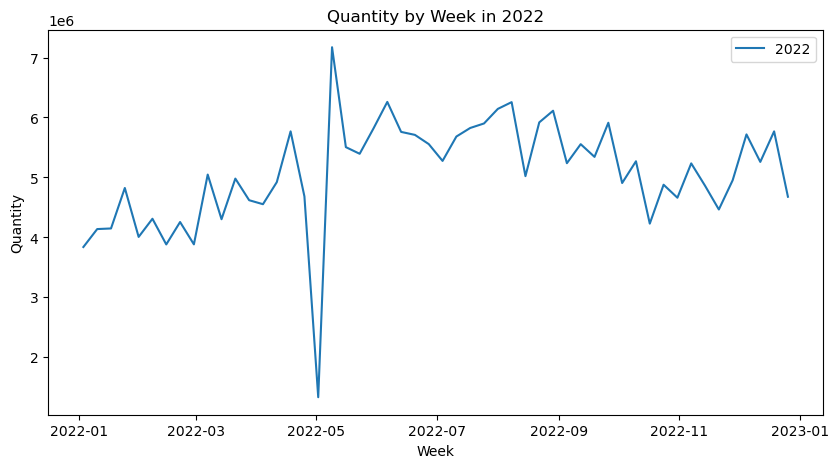

In [20]:
# filter data hanya untuk tahun 2022
df_2022 = df[df['year'] == 2022]

# kelompokkan data berdasarkan tahun dan week_start_date
df_grouped = df_2022.groupby(['year', 'week_start_date']).sum().reset_index()

# buat plot line untuk melihat quantity di setiap week per tahunnya
fig, ax = plt.subplots(figsize=(10, 5))
for year in df_grouped['year'].unique():
    df_year = df_grouped[df_grouped['year'] == year]
    ax.plot(df_year['week_start_date'], df_year['quantity'], label=str(year))

# atur label sumbu x dan y
plt.xlabel('Week')
plt.ylabel('Quantity')
plt.title('Quantity by Week in 2022')
plt.legend()

# tampilkan plot
plt.show()

- Hasil quantity produk pada tahun 2022 cukup stabil, tetapi mengalami penurunan pada bulan Mei 

In [77]:
# filter data hanya untuk tahun 2023
df_2023 = df[df['year'] == 2023]

# hitung jumlah week di tiap bulan di tahun 2023
weeks_by_month = df_2023.groupby('month')['week_start_date'].apply(lambda x: x.dt.date.unique())

# tampilkan hasil
print(weeks_by_month)

month
April                                            [2023-04-03]
February     [2023-02-06, 2023-02-13, 2023-02-20, 2023-02-27]
January     [2023-01-02, 2023-01-09, 2023-01-16, 2023-01-2...
March        [2023-03-06, 2023-03-13, 2023-03-20, 2023-03-27]
Name: week_start_date, dtype: object


- Di tahun 2023, terdapat 4 bulan dalam dataset yang memiliki jumlah minggu sebanyak 14 minggu, dimulai dari 2 Januari hingga 3 April.

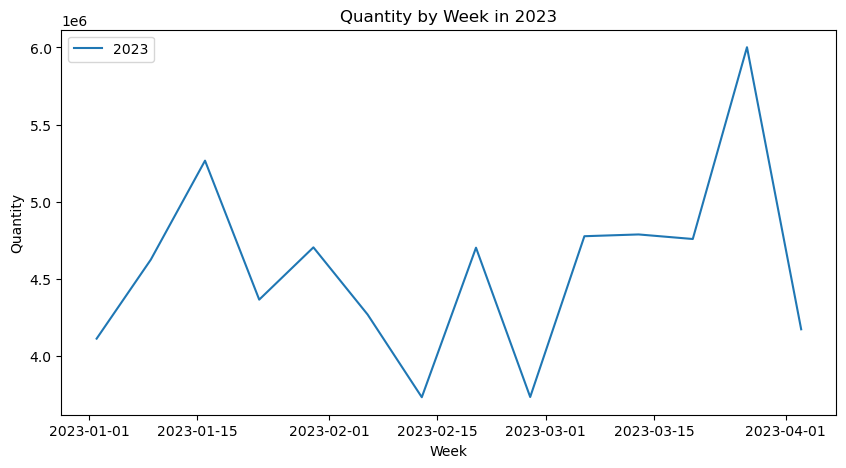

In [22]:
# filter data hanya untuk tahun 2023
df_2023 = df[df['year'] == 2023]

# kelompokkan data berdasarkan tahun dan week_start_date
df_grouped = df_2023.groupby(['year', 'week_start_date']).sum().reset_index()

# buat plot line untuk melihat quantity di setiap week per tahunnya
fig, ax = plt.subplots(figsize=(10, 5))
for year in df_grouped['year'].unique():
    df_year = df_grouped[df_grouped['year'] == year]
    ax.plot(df_year['week_start_date'], df_year['quantity'], label=str(year))

# atur label sumbu x dan y
plt.xlabel('Week')
plt.ylabel('Quantity')
plt.title('Quantity by Week in 2023')
plt.legend()

# tampilkan plot
plt.show()

- Jumlah quantity produk tertinggi tercatat pada bulan Maret tahun 2023

# V. Feature Engineering / Preprocessing

In [23]:
# mengelompokkan berdasarkan kolom week_start_date dan kemudian dihitung total dari kolom quantity untuk setiap week_start_date
df3 = df.groupby('week_start_date')[['quantity']].sum()
df3

,quantity
week_start_date,
2021-12-27,128808
2022-01-03,3839557
2022-01-10,4138934
2022-01-17,4149077
2022-01-24,4824273
...,...
2023-03-06,4775638
2023-03-13,4787111
2023-03-20,4757590


- Dari hasil di atas, dapat disimpulkan bahwa dataset tersebut memiliki data quantity pada rentang waktu dari 27 Desember 2021 sampai dengan 3 April 2023. Terdapat 67 baris data dengan nilai quantity yang bervariasi pada setiap week_start_date.

In [24]:
# mengatur index menjadi indeks datetime
df2 = df3.set_index(pd.to_datetime(df3.index))

## Time Series Decomposition

- Time series decomposition adalah sebuah teknik untuk memecah data time series menjadi beberapa bagian untuk memahami pola di dalamnya. Bayangkan jika kita memiliki data yang merekam penjualan produk selama beberapa tahun. Kita ingin memahami tren penjualan dari waktu ke waktu, serta pola musiman, seperti kenaikan penjualan pada liburan, dan juga variabilitas acak atau tak terduga pada data tersebut. Time series decomposition membantu kita untuk memisahkan pola-pola ini dalam data time series menjadi tiga komponen utama: trend, seasonality, dan residual.
- Trend adalah kecenderungan umum dalam data untuk naik atau turun seiring waktu. Seasonality adalah pola berulang yang terjadi secara teratur dalam interval waktu tertentu, seperti mingguan atau bulanan. Residual adalah variabilitas acak atau tak terduga yang tidak dapat dijelaskan oleh trend atau seasonality.
- Dengan menggunakan seasonal decomposition, kita bisa memahami bagaimana komponen-komponen tersebut berkontribusi terhadap data. Plot hasil decomposition tersebut memungkinkan kita untuk memvisualisasikan dan menganalisis setiap komponen secara terpisah, dan pada akhirnya dapat membantu kita dalam memodelkan dan memprediksi data di masa yang akan datang.

## -Additive-

- Additive Model adalah salah satu teknik dalam analisis time series yang digunakan ketika fluktuasi data time series tidak dipengaruhi oleh level datanya. Dengan kata lain, fluktuasi atau variasi dalam data time series tetap sama terlepas dari apakah datanya tinggi atau rendah. 

<Figure size 1600x900 with 0 Axes>

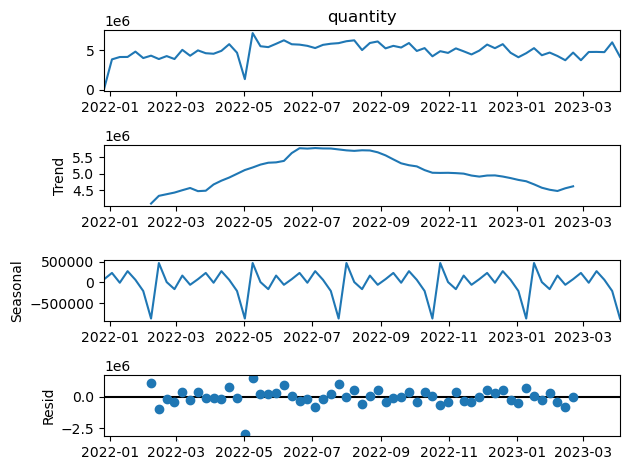

In [25]:
# checking additive 
fig = plt.figure() 
fig.set_size_inches(16, 9)

# melakukan seasonal decomposition pada data df3 dengan kolom quantity menggunakan period 12
a1 = seasonal_decompose(df3['quantity'], period=12)
fig = a1.plot() 
 

Berdasarkan hasil plot Additive di atas, dapat dijelaskan bahwa:
- Trend : menunjukkan bahwa terdapat tren peningkatan dan penurunan kuantitas selama rentang waktu tertentu, namun tren ini tidak bersifat konsisten dan dapat berubah dari waktu ke waktu.
- Seasonal : menunjukkan bahwa terdapat pola yang berulang secara teratur dalam data penjualan, seperti kenaikan penjualan selama periode musim liburan atau penurunan selama periode yang lebih sepi.
- Resid : menunjukkan bahwa setelah tren dan pola musiman telah dikeluarkan dari data, masih terdapat fluktuasi acak yang terjadi di dalam data. Fluktuasi ini bisa disebabkan oleh faktor-faktor tak terduga atau faktor yang sulit diprediksi. Namun, nilai yang cenderung negatif menunjukkan bahwa fluktuasi ini lebih sering terjadi di bawah rata-rata, atau penjualan yang kurang dari yang diharapkan. 
- Fluktuasi penjualan merujuk pada perubahan atau variasi dalam jumlah penjualan suatu produk atau layanan dari waktu ke waktu. Fluktuasi dapat terjadi secara musiman, misalnya ketika terjadi peningkatan penjualan selama liburan atau penurunan penjualan selama musim kemarau. Fluktuasi juga dapat terjadi secara acak atau tidak terduga, seperti ketika ada perubahan dalam kondisi pasar atau adanya peristiwa yang tidak terduga yang mempengaruhi perilaku konsumen. 

## -Multiplicative-

- Multiplicative Model: Model ini digunakan jika besarnya fluktuasi pada time series bergantung pada level data. Pada model ini, tiap komponen dalam time series dihitung dengan memperkalian tiap nilai yang ada

<Figure size 1600x900 with 0 Axes>

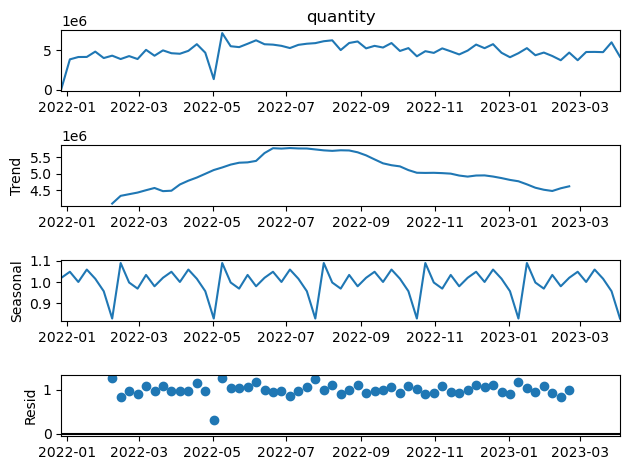

In [26]:
# checking multiplicative
fig = plt.figure() 
fig.set_size_inches(16, 9)

# melakukan seasonal decomposition pada data df3 dengan kolom quantity menggunakan period 12 multiplicative
m1 = seasonal_decompose(df3['quantity'], period=12,model= 'multiplicative')
fig = m1.plot() 

Berdasarkan hasil plot Multiplicative di atas, dapat dijelaskan bahwa:
- Tren penjualan cenderung mengalami kenaikan dan penurunan yang relatif besar seiring waktu. 
- Seasonal atau pola musiman yang teratur dalam data, artinya pola fluktuasi dalam penjualan mungkin terkait dengan musim tertentu dalam setahun.
- Residual yang kecil menunjukkan bahwa model telah berhasil menggambarkan tren dan pola musiman dengan cukup baik, dan bahwa fluktuasi yang tidak dapat dijelaskan oleh tren dan musim telah berhasil diminimalkan. Namun, perlu diperhatikan bahwa analisis ini hanya didasarkan pada plot sinyal time series dan tidak mempertimbangkan faktor lain seperti data eksternal atau peristiwa khusus yang mungkin memengaruhi tren dan fluktuasi dalam data tersebut.

## Data Splitting

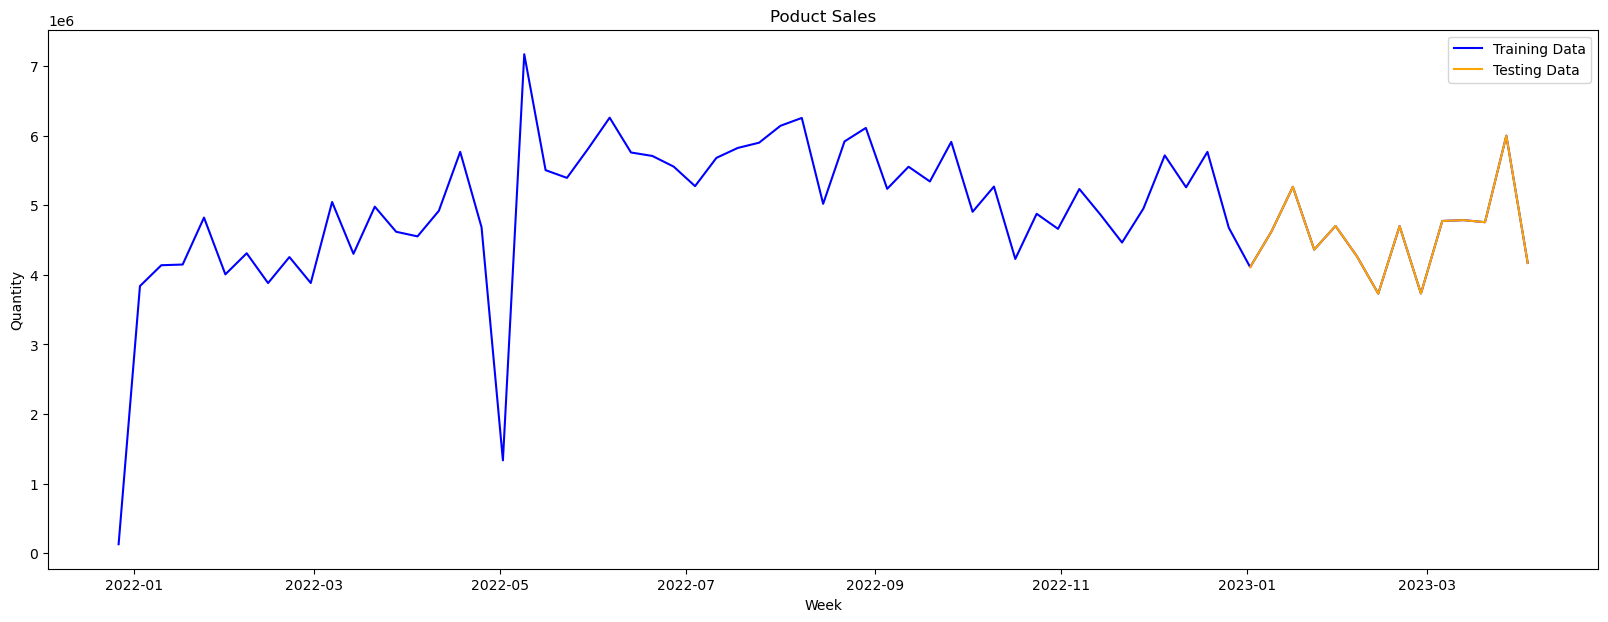

In [54]:
# split data train dan data test
train_data, test_data = df3[0:int(len(df3)*0.8)], df3[int(len(df3)*0.8):] # memisahkan data train sebanyak 80 % dan test sebanyak 20 %

plt.figure(figsize=(20,7))
plt.title('Poduct Sales')
plt.xlabel('Week')
plt.ylabel('Quantity')
plt.plot(df3['quantity'], 'blue', label='Training Data')
plt.plot(test_data['quantity'], 'orange', label='Testing Data')
plt.legend()

## -Stationary-

- Stationarity pada data time series digunakan untuk mengecek apakah data memiliki sifat yang stabil sepanjang waktu. Sifat ini meliputi konsistensi statistik seperti rata-rata, variansi, dan korelasi antar data yang tidak berubah secara signifikan seiring waktu.

In [28]:
# melakukan uji stasioneritas (stationarity test) pada suatu time series data menggunakan Augmented Dickey-Fuller test (ADF test)
def check_stationarity(series):
    result = adfuller(series.values)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [29]:
# check stationarity pada data train
check_stationarity(train_data['quantity'])

ADF Statistic: -7.196339
p-value: 0.000000
Critical Values:
	1%: -3.563
	5%: -2.919
	10%: -2.597
Stationary


- Berdasarkan hasil di atas, dapat disimpulkan jika data time series bersifat stasioner, artinya data tersebut tidak memiliki tren atau pola yang signifikan dan fluktuasinya stabil sepanjang waktu. Dengan demikian, kita dapat mengasumsikan bahwa karakteristik statistik data tetap konstan pada waktu yang berbeda dan dapat diandalkan untuk membangun model prediksi yang akurat.

# VI. Model Definition

#### -Penjelasan algoritma-algoritma model yang digunakan - ####
1. ARIMA (Auto Regressive Integrated Moving Average) adalah model prediksi time series yang berdasarkan pada nilai-nilai historis dari data. Model ini dapat digunakan untuk meramalkan data yang tidak memiliki tren dan pola musiman, serta memperhitungkan deret waktu yang terintegrasi atau stasioner. Kelebihan dari model ARIMA adalah kemampuannya dalam menangkap pola-pola fluktuasi yang terdapat dalam data, serta mampu menangani data yang memiliki banyak perubahan. Namun, kekurangan dari model ARIMA adalah keterbatasannya dalam menangani data yang memiliki pola musiman yang kompleks serta kemampuan komputasi yang membutuhkan waktu dan sumber daya yang lebih banyak.
2. Holt-Winters adalah model prediksi time series yang dapat digunakan untuk meramalkan data yang memiliki tren dan pola musiman. Model ini menggabungkan tiga komponen, yaitu level, tren, dan pola musiman, sehingga sangat cocok untuk meramalkan data yang memiliki fluktuasi berulang dalam periode waktu tertentu. Kelebihan dari model ini adalah kemampuannya dalam menangkap dan mengikuti tren serta pola musiman yang kompleks pada data, sehingga memberikan hasil prediksi yang akurat. Namun, kekurangan dari model ini adalah sensitif terhadap data outlier atau data yang tidak biasa yang dapat mempengaruhi hasil prediksi.

# VII. Model Training

## -Arima-

In [30]:
# membuat model ARIMA secara otomatis menggunakan fungsi "auto_arima"  
model_arima = auto_arima(df3['quantity'], start_p=0, d=1, start_q=0,
                                   max_p=5, max_d=5, max_q=5, start_P=0,
                                   D=1, start_Q=0, max_P=5, max_D=5,
                                   max_Q=5, m=4, seasonal=True,
                                   error_action='warn', trace=True,
                                   supress_warning=True, stepwise=True,
                                   random_state=42, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=1950.744, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=1920.123, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=1901.932, Time=0.02 sec
 ARIMA(0,1,1)(0,1,0)[4]             : AIC=1921.111, Time=0.01 sec
 ARIMA(0,1,1)(1,1,1)[4]             : AIC=1903.845, Time=0.02 sec
 ARIMA(0,1,1)(0,1,2)[4]             : AIC=1903.831, Time=0.12 sec
 ARIMA(0,1,1)(1,1,0)[4]             : AIC=1911.382, Time=0.02 sec
 ARIMA(0,1,1)(1,1,2)[4]             : AIC=1905.429, Time=0.09 sec
 ARIMA(0,1,0)(0,1,1)[4]             : AIC=1922.930, Time=0.02 sec
 ARIMA(1,1,1)(0,1,1)[4]             : AIC=1902.569, Time=0.05 sec
 ARIMA(0,1,2)(0,1,1)[4]             : AIC=1905.215, Time=0.05 sec
 ARIMA(1,1,0)(0,1,1)[4]             : AIC=1907.759, Time=0.02 sec
 ARIMA(1,1,2)(0,1,1)[4]             : AIC=1904.562, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[4] intercept   : AIC=1904.424, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,1,1)

- Dari hasil di atas, dapat disimpulkan bahwa model terbaik yang dihasilkan adalah ARIMA(0,1,1)(0,1,1)[4] dengan nilai AIC sebesar 1901.932. Model tersebut dipilih setelah dilakukan proses stepwise search yang bertujuan untuk meminimalkan nilai AIC. Total waktu yang dibutuhkan untuk fitting model tersebut adalah 0.432 detik.
- AIC (Akaike Information Criterion) adalah salah satu metrik untuk mengevaluasi kualitas model statistik. Semakin rendah nilai AIC, semakin baik kualitas modelnya.

In [31]:
# membuat model ARIMA dengan order best model (0,1,1)
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 100/ (np.abs(y_pred) + np.abs(y_true))))

train_ar = train_data['quantity'].values
test_ar = test_data['quantity'].values

history = [x for x in train_ar]
print(type(history))

# melakukan prediksi pada data test dengan memperbarui history pada setiap iterasinya
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(0,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)

<class 'list'>


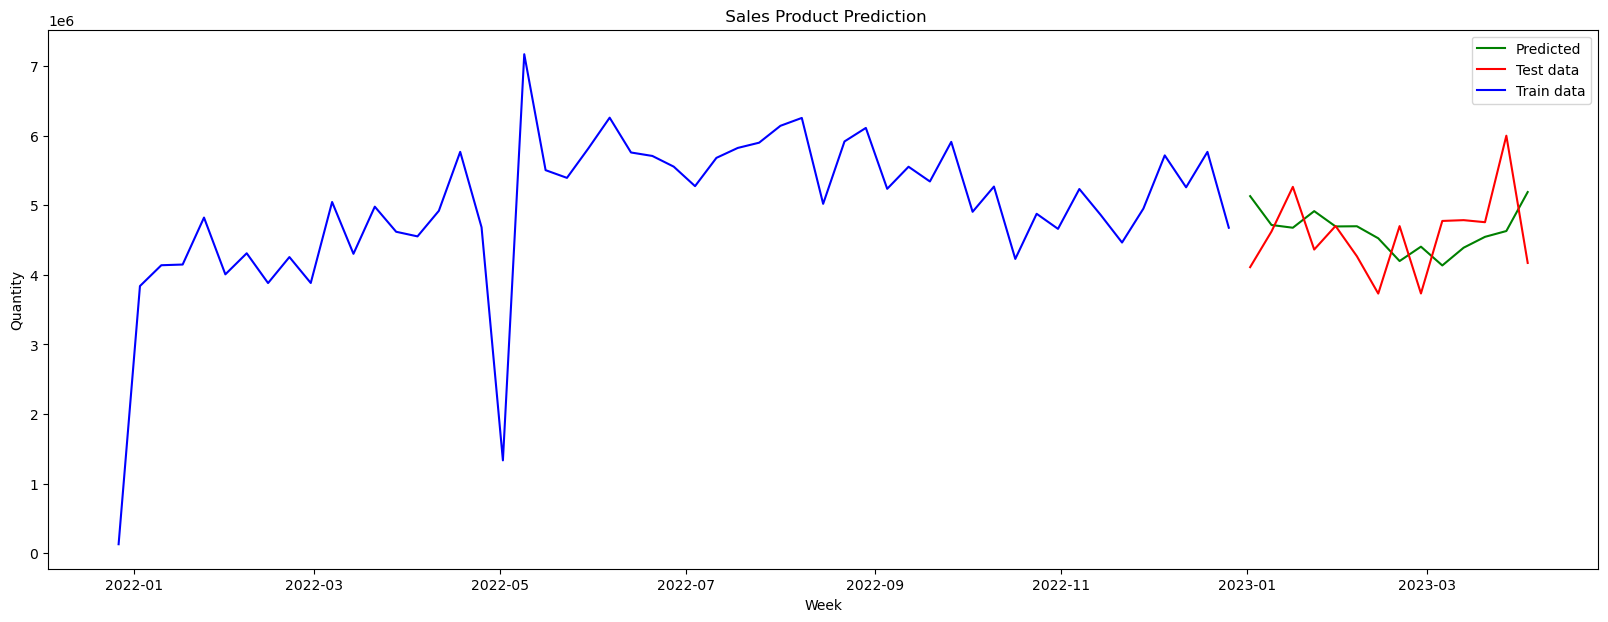

In [55]:
# memvisualisasikan hasil prediksi dan data aktual dari model ARIMA yang telah dilatih sebelumnya
plt.figure(figsize=(20,7))

plt.plot(test_data.index, predictions, color='green', label='Predicted')
plt.plot(test_data.index, test_data["quantity"], color='red', label='Test data')
plt.plot(train_data.index, train_data["quantity"], color='blue', label='Train data')
plt.title(' Sales Product Prediction')
plt.xlabel('Week')
plt.ylabel('Quantity')
plt.legend()

In [33]:
# menggabungkan hasil prediksi dan nilai aktual dari data uji menjadi satu dataframe
actual=pd.DataFrame()
actual=pd.DataFrame(test_ar,columns=["Quantity"])
predicted=pd.DataFrame(list(predictions),columns=["Predicted"])
actual=actual.reset_index(drop=True)
predicted=predicted.reset_index(drop=True)
output=pd.concat([actual,predicted],axis=1)
output

,Quantity,Predicted
0,4111427,5.132190e+06
1,4623965,4.717436e+06
2,5265632,4.678084e+06
3,4364421,4.916619e+06
4,4703388,4.696557e+06
5,4267946,4.699325e+06
6,3731588,4.526330e+06
7,4701262,4.199205e+06
8,3732954,4.405878e+06
9,4775638,4.135908e+06


- Dari hasil di atas, dapat disimpulkan bahwa kolom Quantity merepresentasikan nilai aktual dari data uji dan kolom Predicted merepresentasikan hasil prediksi yang telah dilakukan oleh model. Model yang digunakan menghasilkan prediksi yang bervariasi, dengan selisih antara nilai aktual dan nilai prediksi yang berbeda-beda untuk setiap data uji, yang menunjukkan bahwa model mungkin memiliki kesalahan dalam memprediksi jumlah produk untuk beberapa baris data uji. 

## -Holt Winters-

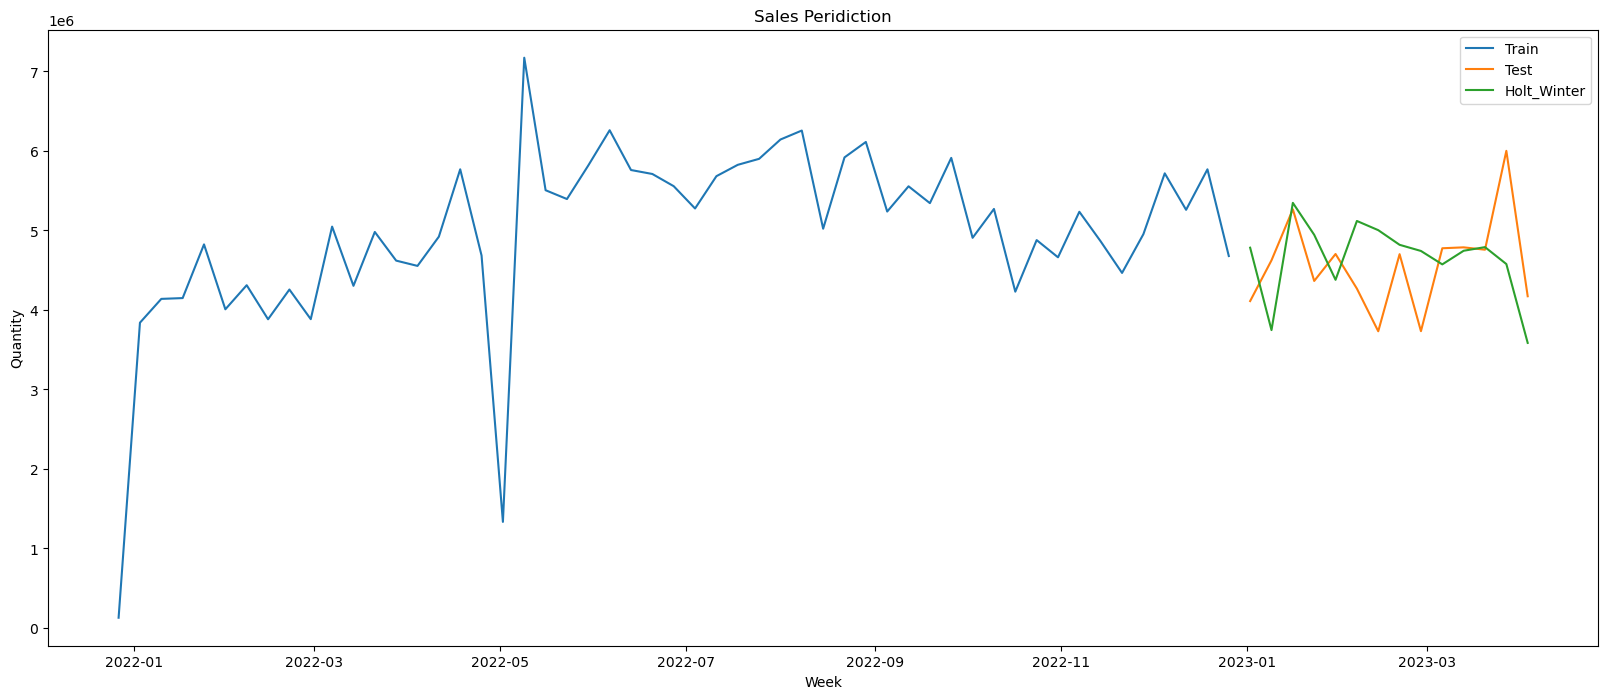

In [56]:
# membuat model dengan metode Holt-Winters pada data quantity berdasarkan tren dan seasonality
y_hat_avg = test_data.copy()
fit_holt = ExponentialSmoothing(np.asarray(train_data['quantity']) ,seasonal_periods=12 ,trend='multiplicative', seasonal='multiplicative',).fit()
y_hat_avg['Holt_Winter'] = fit_holt.forecast(len(test_data))
plt.figure(figsize=(20,8))
plt.plot( train_data['quantity'], label='Train')
plt.plot(test_data['quantity'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.title('Sales Peridiction')
plt.xlabel('Week')
plt.ylabel('Quantity')
plt.legend(loc='best')
plt.show()

In [35]:
# membuat dataframe yang berisi nilai aktual dan nilai prediksi dari model Holt-Winters
train_ho = train_data['quantity'].values
test_ho = test_data['quantity'].values

actual_ho = pd.DataFrame()
actual_ho = pd.DataFrame(test_ho,columns=["Quantity_ho"])
predicted_ho = pd.DataFrame(list(y_hat_avg['Holt_Winter']),columns=["Predicted_ho"])
actual_ho = actual_ho .reset_index(drop=True)
predicted_ho = predicted_ho .reset_index(drop=True)
output_ho = pd.concat([actual_ho ,predicted_ho],axis=1)
output_ho 

,Quantity_ho,Predicted_ho
0,4111427,4.782681e+06
1,4623965,3.746340e+06
2,5265632,5.346637e+06
3,4364421,4.944878e+06
4,4703388,4.378856e+06
5,4267946,5.118957e+06
6,3731588,5.003328e+06
7,4701262,4.819095e+06
8,3732954,4.741686e+06
9,4775638,4.572964e+06


- Dari hasil prediksi tersebut, dapat dilihat bahwa model memprediksi nilai lebih tinggi dari nilai aktual pada beberapa observasi, dan lebih rendah pada observasi lainnya.

# VIII. Model Evaluation

## -Arima-

In [36]:
# menghitung beberapa metrik evaluasi performa model prediksi (forecasting) pada data time series
MEAN = df3['quantity'].mean()
MAE = mean_absolute_error(output['Quantity'], output['Predicted'])
MSE = mean_squared_error(output['Quantity'], output['Predicted'])
RMSE = np.sqrt(mean_squared_error(output['Quantity'], output['Predicted']))
MAPE = mean_absolute_percentage_error(output['Quantity'], output['Predicted'])

# membuat sebuah dataframe bernama score yang berisi beberapa metrik evaluasi hasil prediksi
predict = ['Quantity']
score = pd.DataFrame(predict)
score.rename(columns={0:'Predict'},inplace = True)
score['MEAN']= (MEAN)
score['MAE']= (MAE)
score['MSE']= (MSE)
score['RMSE']=(RMSE)
score['MAPE']=(MAPE)
score

,Predict,MEAN,MAE,MSE,RMSE,MAPE
0,Quantity,4.893709e+06,592694.76621,4.821853e+11,694395.616641,0.131623


- Nilai MAE (Mean Absolute Error) pada hasil model sebesar 592,694. MAE adalah metrik evaluasi untuk mengevaluasi seberapa akurat hasil prediksi model. Semakin kecil nilai MAE, semakin akurat prediksi model. Dalam kasus ini, nilai MAE sebesar 592,694 menunjukkan bahwa rata-rata kesalahan absolut antara nilai prediksi dan nilai observasi sekitar 592,694. Oleh karena itu, kita dapat menyimpulkan bahwa model tidak terlalu akurat dalam memprediksi kuantitas penjualan di masa depan.
- MSE (Mean Squared Error) digunakan untuk mengukur seberapa jauh rata-rata kuadrat kesalahan prediksi dari nilai yang sebenarnya. Semakin rendah nilai MSE, semakin baik performa model. Dalam kasus ini, nilai MSE sebesar 	4.821853e+11 menunjukkan bahwa rata-rata kuadrat kesalahan prediksi dari model cukup besar, sehingga model perlu diperbaiki lagi.
- Nilai RMSE atau Root Mean Squared Error adalah 694395.616641. RMSE digunakan untuk mengukur seberapa besar deviasi atau kesalahan prediksi yang dihasilkan oleh model terhadap data aktual. Semakin kecil nilai RMSE, semakin baik pula performa model dalam memprediksi data. Dalam kasus ini, nilai RMSE cukup besar, yaitu sekitar 694395.616641, yang menunjukkan bahwa prediksi model cenderung memiliki kesalahan atau deviasi yang signifikan dari data aktual. Oleh karena itu, hasil prediksi model perlu dievaluasi lebih lanjut dan diperbaiki jika diperlukan untuk meningkatkan performa model.
- Nilai MAPE (Mean Absolute Percentage Error) pada model prediksi menunjukkan persentase rata-rata kesalahan absolut antara nilai aktual dan nilai prediksi. Semakin kecil nilai MAPE, semakin baik performa model dalam memprediksi data. Dalam hasil kode yang diberikan, nilai MAPE pada model adalah 0.131573 atau sekitar 13 %. Ini artinya, rata-rata kesalahan absolut antara nilai aktual dan nilai prediksi adalah sekitar 13 % dari nilai aktual. Meskipun ini masih dianggap cukup rendah, namun nilai MAPE ini tetap harus dilihat bersamaan dengan nilai lainnya seperti RMSE untuk menilai performa model secara keseluruhan.

## -Holt Winters-

In [37]:
# menghitung beberapa metrik evaluasi performa model prediksi (forecasting) pada data time series
print("MAE :", mean_absolute_error(test_data.quantity, y_hat_avg.Holt_Winter))
print("MSE :", mean_squared_error(test_data.quantity, y_hat_avg.Holt_Winter))
print("RMAE :", np.sqrt(mean_squared_error(test_data.quantity, y_hat_avg.Holt_Winter)))
print("MAPE :", mean_absolute_percentage_error(test_data.quantity, y_hat_avg.Holt_Winter))

MAE : 576621.3563812245
MSE : 532742620385.09607
RMAE : 729892.1977834097
MAPE : 0.1315731129125543


In [38]:
# menghitung beberapa metrik evaluasi performa model prediksi (forecasting) pada data time series
MEAN_ho = df3['quantity'].mean()
MAE_ho = mean_absolute_error(test_data.quantity, y_hat_avg.Holt_Winter)
MSE_ho = mean_squared_error(test_data.quantity, y_hat_avg.Holt_Winter)
RMSE_ho = np.sqrt(mean_squared_error(test_data.quantity, y_hat_avg.Holt_Winter))
MAPE_ho = mean_absolute_percentage_error(test_data.quantity, y_hat_avg.Holt_Winter)

# membuat sebuah dataframe bernama score2 yang berisi beberapa metrik evaluasi hasil prediksi
predict = ['Quantity_ho']
score2 = pd.DataFrame(predict)
score2.rename(columns={0:'Predict'},inplace = True)
score2['MEAN']= (MEAN_ho)
score2['MAE']= (MAE_ho)
score2['MSE']= (MSE_ho)
score2['RMSE']=(RMSE_ho)
score2['MAPE']=(MAPE_ho)

score2

,Predict,MEAN,MAE,MSE,RMSE,MAPE
0,Quantity_ho,4.893709e+06,576621.356381,5.327426e+11,729892.197783,0.131573


- Nilai MAE (Mean Absolute Error) pada hasil model sebesar 576,621.35. MAE adalah metrik evaluasi untuk mengevaluasi seberapa akurat hasil prediksi model. Semakin kecil nilai MAE, semakin akurat prediksi model. Dalam kasus ini, nilai MAE sebesar 576,621.35 menunjukkan bahwa rata-rata kesalahan absolut antara nilai prediksi dan nilai observasi sekitar 576,621.35. Oleh karena itu, kita dapat menyimpulkan bahwa model tidak terlalu akurat dalam memprediksi kuantitas penjualan di masa depan.
- MSE (Mean Squared Error) digunakan untuk mengukur seberapa jauh rata-rata kuadrat kesalahan prediksi dari nilai yang sebenarnya. Semakin rendah nilai MSE, semakin baik performa model. Dalam kasus ini, nilai MSE sebesar 5.327426e+11 menunjukkan bahwa rata-rata kuadrat kesalahan prediksi dari model cukup besar, sehingga model perlu diperbaiki lagi.
- Nilai RMSE atau Root Mean Squared Error adalah 729,892.197783. RMSE digunakan untuk mengukur seberapa besar deviasi atau kesalahan prediksi yang dihasilkan oleh model terhadap data aktual. Semakin kecil nilai RMSE, semakin baik pula performa model dalam memprediksi data. Dalam kasus ini, nilai RMSE cukup besar, yaitu sekitar 729,892.197783, yang menunjukkan bahwa prediksi model cenderung memiliki kesalahan atau deviasi yang signifikan dari data aktual. Oleh karena itu, hasil prediksi model perlu dievaluasi lebih lanjut dan diperbaiki jika diperlukan untuk meningkatkan performa model.
- Nilai MAPE (Mean Absolute Percentage Error) pada model prediksi menunjukkan persentase rata-rata kesalahan absolut antara nilai aktual dan nilai prediksi. Semakin kecil nilai MAPE, semakin baik performa model dalam memprediksi data. Dalam hasil kode yang diberikan, nilai MAPE pada model adalah 0.131573 atau sekitar 13.16%. Ini artinya, rata-rata kesalahan absolut antara nilai aktual dan nilai prediksi adalah sekitar 13.16% dari nilai aktual. Meskipun ini masih dianggap cukup rendah, namun nilai MAPE ini tetap harus dilihat bersamaan dengan nilai lainnya seperti RMSE untuk menilai performa model secara keseluruhan.

## -FORECAST-

In [39]:
# membuat forecasting dengan menggunakan model ARIMA pada train_data dan test_data 12 minggu ke depan
forecast_ar = model_arima.predict(start = len(df3), 
                          end = (len(df3))+ 12)

In [40]:
# hasil prediksi dari model ARIMA disimpan ke dalam dataframe, yang berisi prediksi quantity produk selama 12 minggu ke depan
forecast_final = pd.DataFrame(forecast_ar)
forecast_final = forecast_final.rename(columns={0: 'Forecast'})
forecast_final

,Forecast
2023-04-10,4.984303e+06
2023-04-17,4.844285e+06
2023-04-24,5.004732e+06
2023-05-01,4.694947e+06
2023-05-08,5.032830e+06
2023-05-15,4.892812e+06
2023-05-22,5.053259e+06
2023-05-29,4.743474e+06
2023-06-05,5.081357e+06
2023-06-12,4.941339e+06


- Dari hasil prediksi di atas, dapat disimpulkan bahwa pada rentang waktu dari tanggal 10 April 2023 hingga 12 Juni 2023, terjadi fluktuasi jumlah produk yang diprediksi akan dibeli oleh konsumen. Terdapat beberapa minggu di mana jumlah produk yang diprediksi dibeli oleh konsumen naik, seperti pada tanggal 24 April, 22 Mei dan 05 Juni, namun juga terdapat minggu di mana jumlah produk yang diprediksi dibeli oleh konsumen turun, seperti pada tanggal 1 Mei dan 29 Mei.Namun, jumlah produk yang diprediksi akan dibeli oleh konsumen pada akhir periode (12 Juni 2023) hampir sama dengan jumlah produk yang diprediksi pada awal periode (10 April 2023).

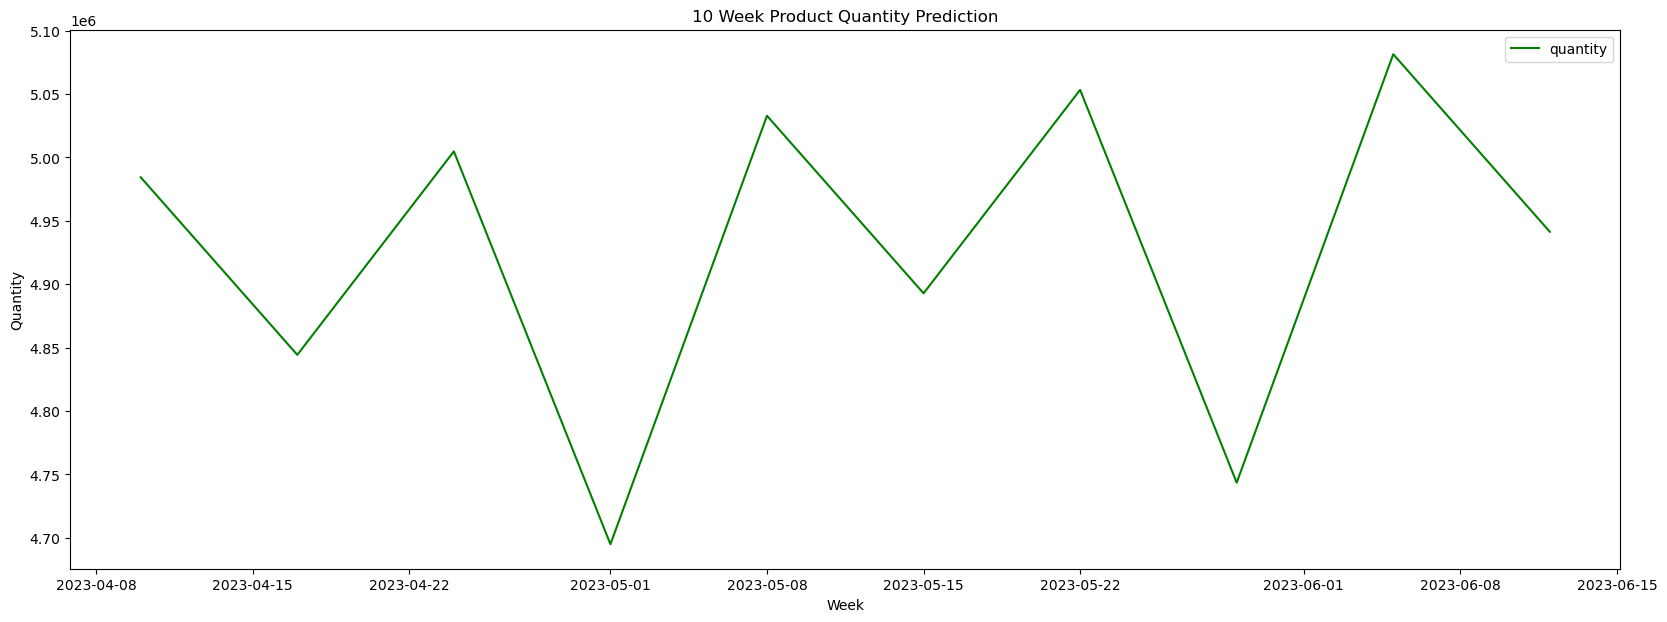

In [57]:
# memvisualisasikan hasil prediksi 10 week kedepan
plt.figure(figsize=(20,7))
plt.plot(forecast_final, color='green', label='quantity')
plt.title('10 Week Product Quantity Prediction')
plt.xlabel('Week')
plt.ylabel('Quantity')
plt.legend()

- Dari hasil prediksi forcast tersebut dapat disimpulkan bahwa pada periode 10 minggu ke depan, terjadi kenaikan pada jumlah quantity produk yang diprediksi secara bertahap hingga mencapai puncaknya pada minggu ke-9 dan kemudian menurun di akhir periode. 

In [65]:
# # membuat forecasting dengan menggunakan model ARIMA pada train_data dan test_data 10 minggu ke depan
# forecast_ar = fit_holt.predict(start = len(df3), 
#                           end = (len(df3))+ 10)

# # hasil prediksi dari model Holt Winters disimpan ke dalam dataframe, yang berisi prediksi quantity produk selama 12 minggu ke depan
# forecast_final2 = pd.DataFrame(forecast_ar)
# forecast_final2 = forecast_final2.rename(columns={0: 'Forecast'})
# forecast_final2

In [64]:
# # memvisualisasikan hasil prediksi 10 week kedepan
# plt.figure(figsize=(20,7))
# plt.plot(forecast_final2, color='green', label='quantity')
# plt.title('10 Week Product Quantity Prediction')
# plt.xlabel('Week')
# plt.ylabel('Quantity')
# plt.legend()

# IX. Kesimpulan

1. Model forcast bekerja cukup baik dalam memprediksi penjualan 14 week ke depan, saya membandingkan hasil dari kedua algoritma yaitu Holt Winters dan Arima dan mendapatkan hasil yang berbeda. Algoritma Arima memberikan hasil yang lebih baik daripada Holt Winters dalam kasus ini. Hasil MAPE menunjukkan bahwa hasil kesalahan yaitu 13 % di setiap kategori. Yang berarti akurasi prediksi sebesar 87 %. Namun, perlu diingat bahwa prediksi ini hanya didasarkan pada data historis dan dapat dipengaruhi oleh faktor-faktor lain yang tidak teridentifikasi. Oleh karena itu, hasil prediksi ini sebaiknya digunakan sebagai referensi dan tidak dapat dijadikan sebagai kepastian.

2. Hasil prediksi forcast dapat digunakan sebagai dasar untuk perencanaan bisnis di masa depan, terutama dalam perencanaan produksi dan persediaan barang. Misalnya, hasil prediksi tersebut dapat digunakan untuk memprediksi permintaan produk di masa depan, sehingga dapat membantu perusahaan dalam mengoptimalkan produksi dan persediaan barang, serta menghindari risiko overstocking atau understocking. Hal ini dapat membantu perusahaan dalam memaksimalkan keuntungan dan mengurangi biaya yang tidak perlu.